# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from geopy.geocoders import Nominatim

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
#from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Initialize geopy
geolocator = Nominatim(user_agent="geoapi")

# Empty list for holding city data
city_data = []

# Set restricted latitude and longitude ranges (land-dense areas)
lat_range = (-50, 50)
lng_range = (-150, 150)

# Create random latitude and longitude pairs
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)  # Batch size
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Start logging progress
print("Beginning Data Retrieval")
print("-----------------------------")

# Process coordinates
for i, (lat, lng) in enumerate(lat_lngs, start=1):
    try:
        print(f"Processing Record {i} | Coordinates: ({lat}, {lng})")
        location = geolocator.reverse((lat, lng), exactly_one=True, timeout=10)
        if location:
            address = location.raw.get("address", {})
            city = address.get("city", address.get("town", address.get("village", None)))
            country = address.get("country", None)

            if city and country:
                city_data.append({"City": city, "Lat": lat, "Lng": lng, "Country": country})
            else:
                print(f"No populated location found for coordinates ({lat}, {lng}).")
        else:
            print(f"No location found for coordinates ({lat}, {lng}).")
    except Exception as e:
        print(f"Error finding city for coordinates ({lat}, {lng}): {e}")

    # Pause to avoid hitting the geocoding rate limit
    time.sleep(1)

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Save the data to a CSV file
city_data_df = pd.DataFrame(city_data)
output_path = "output_data/cities.csv"
city_data_df.to_csv(output_path, index_label="City_ID")

# Display results
print(f"Number of cities found: {len(city_data)}")
print(f"Saved to {output_path}.")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Coordinates: (-35.75728479721361, 86.77595414328923)
No location found for coordinates (-35.75728479721361, 86.77595414328923).
Processing Record 2 | Coordinates: (39.094756902285326, -24.286181635516485)
No location found for coordinates (39.094756902285326, -24.286181635516485).
Processing Record 3 | Coordinates: (49.84117062919634, -35.96095235796976)
No location found for coordinates (49.84117062919634, -35.96095235796976).
Processing Record 4 | Coordinates: (-28.261049305049447, -134.63776520158478)
No location found for coordinates (-28.261049305049447, -134.63776520158478).
Processing Record 5 | Coordinates: (15.821914860101757, -97.1694875091647)
Processing Record 6 | Coordinates: (47.027439279586574, 27.706692070632556)
Processing Record 7 | Coordinates: (26.68515223187741, 34.86728020906787)
No location found for coordinates (26.68515223187741, 34.86728020906787).
Processing Record 8 | Coordinates: (

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from geopy.geocoders import Nominatim

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
#from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

NameError: name 'citipy' is not defined

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Saint-Adolphe-d'Howard
Processing Record 2 of Set 1 | 吉安市
Processing Record 3 of Set 1 | 新巴尔虎右旗
Processing Record 4 of Set 1 | Tinerkouk
City not found. Skipping...
Processing Record 5 of Set 1 | Kamiji
City not found. Skipping...
Processing Record 6 of Set 1 | The Big Five False Bay Local Municipality
City not found. Skipping...
Processing Record 7 of Set 1 | دهستان طبس
Processing Record 8 of Set 1 | In Guezzam ⵄⵉⵏ ⴳⴻⵣⵣⴰⵎ عين قزام
City not found. Skipping...
Processing Record 9 of Set 1 | Pau d'Arco do Piauí
Processing Record 10 of Set 1 | Devgarh
Processing Record 11 of Set 1 | Badasso
Processing Record 12 of Set 1 | Brentwood
Processing Record 13 of Set 1 | Kasangulu
Processing Record 14 of Set 1 | Belel
Processing Record 15 of Set 1 | Timokten
Processing Record 16 of Set 1 | تيشيت
City not found. Skipping...
Processing Record 17 of Set 1 | 马当镇
Processing Record 18 of Set 1 | Cherwell
City not

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

# Show Record Count
city_data_df.count()

City          65
Lat           65
Lng           65
Max Temp      65
Humidity      65
Cloudiness    65
Wind Speed    65
Country       65
Date          65
dtype: int64


City          65
Lat           65
Lng           65
Max Temp      65
Humidity      65
Cloudiness    65
Wind Speed    65
Country       65
Date          65
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Adolphe-d'Howard,45.9713,-74.3393,2.83,65,3,4.13,CA,1731796083
1,吉安市,27.1145,114.9836,18.08,95,0,2.84,CN,1731796084
2,新巴尔虎右旗,48.6705,116.8161,-10.65,59,5,7.05,CN,1731796085
3,دهستان طبس,36.4039,57.7089,6.50,51,85,0.87,IR,1731796090
4,Pau d'Arco do Piauí,-5.2544,-42.3871,32.14,24,47,2.44,BR,1731796092


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Saint-Adolphe-d'Howard,45.9713,-74.3393,2.83,65,3,4.13,CA,1731796083
1,吉安市,27.1145,114.9836,18.08,95,0,2.84,CN,1731796084
2,新巴尔虎右旗,48.6705,116.8161,-10.65,59,5,7.05,CN,1731796085
3,دهستان طبس,36.4039,57.7089,6.50,51,85,0.87,IR,1731796090
4,Pau d'Arco do Piauí,-5.2544,-42.3871,32.14,24,47,2.44,BR,1731796092


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

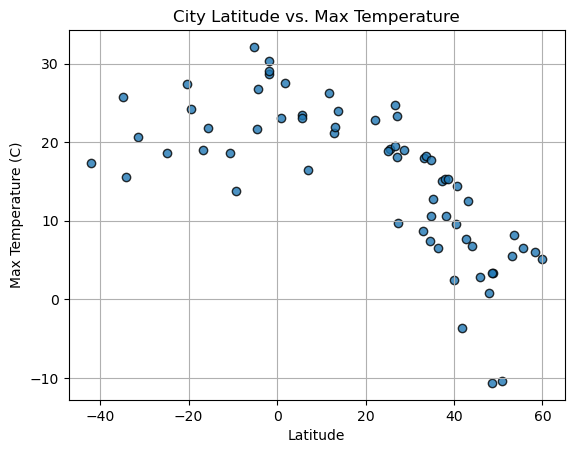

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [23]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


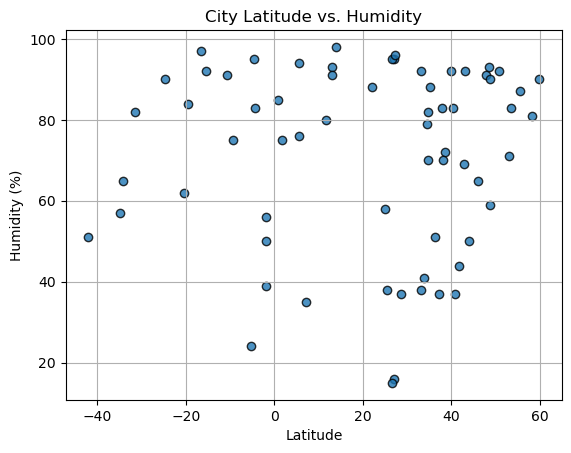

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

In [27]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


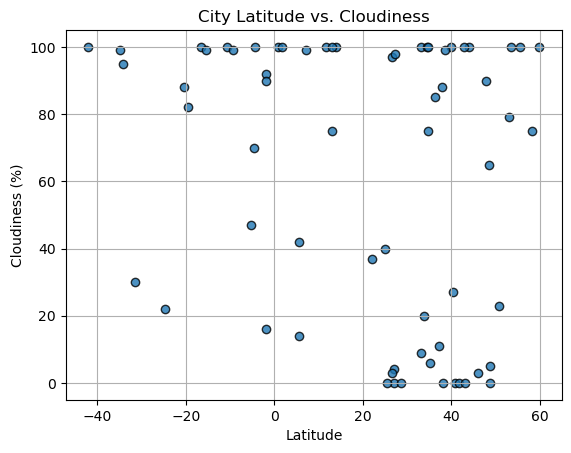

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

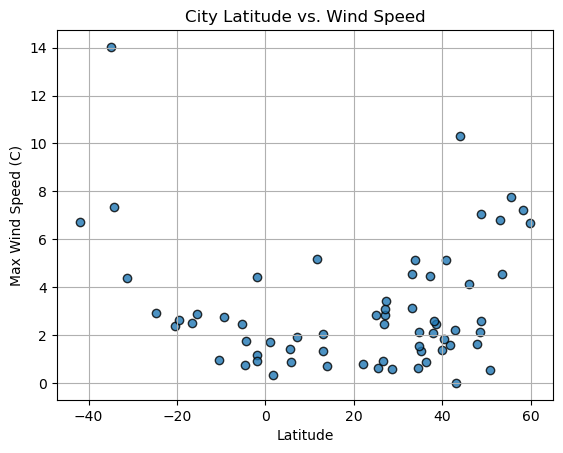

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    """
    This function performs linear regression, plots the data points, the regression line,
    and displays the r-squared value and equation on the plot.

    Parameters:
    - x_values: Data for x-axis
    - y_values: Data for y-axis
    - title: Plot title
    - xlabel: Label for x-axis
    - ylabel: Label for y-axis
    - hemisphere: Hemisphere description (Northern or Southern Hemisphere)
    """
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    plt.legend()

    # Add titles and labels
    plt.title(f"{title} ({hemisphere})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Print the r-squared value
    print(f"{title} ({hemisphere}): r-squared = {rvalue**2:.2f}")

    # Show the plot
    plt.show()

In [ ]:
# Separate the data into Northern and Southern hemispheres:
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Saint-Adolphe-d'Howard,45.9713,-74.3393,2.83,65,3,4.13,CA,1731796083
1,吉安市,27.1145,114.9836,18.08,95,0,2.84,CN,1731796084
2,新巴尔虎右旗,48.6705,116.8161,-10.65,59,5,7.05,CN,1731796085
3,دهستان طبس,36.4039,57.7089,6.50,51,85,0.87,IR,1731796090
5,Devgarh,25.5333,73.9000,19.10,38,0,0.62,IN,1731796093


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,Pau d'Arco do Piauí,-5.2544,-42.3871,32.14,24,47,2.44,BR,1731796092
8,Kasangulu,-4.5911,15.1708,21.67,95,70,0.75,CD,1731796097
23,Arthurton,-34.2667,137.7500,15.54,65,95,7.36,AU,1731796126
25,Castro,-24.7911,-50.0119,18.67,90,22,2.92,BR,1731796129
26,Alenquer,-1.9417,-54.7383,28.65,56,92,1.16,BR,1731796131


###  Temperature vs. Latitude Linear Regression Plot

Max Temperature vs. Latitude (Northern Hemisphere): r-squared = 0.63


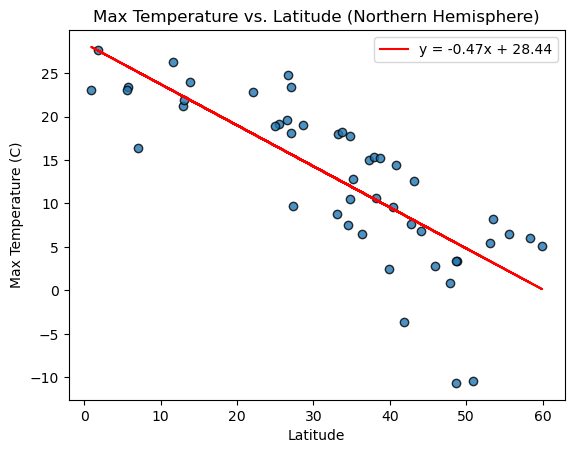

In [36]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Max Temperature vs. Latitude",
    "Latitude",
    "Max Temperature (C)",
    "Northern Hemisphere"
)

Max Temperature vs. Latitude (Southern Hemisphere): r-squared = 0.26


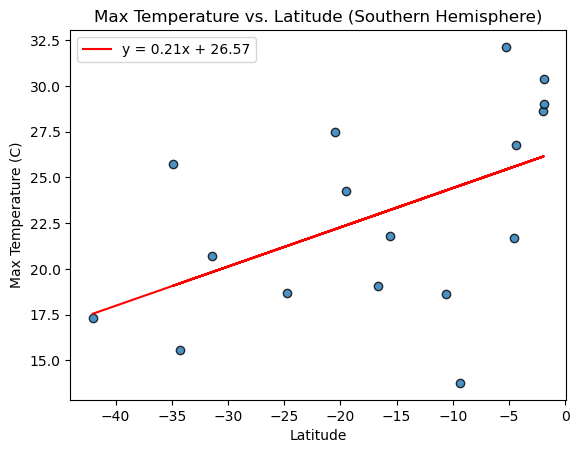

In [37]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Max Temperature vs. Latitude",
    "Latitude",
    "Max Temperature (C)",
    "Southern Hemisphere"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Max Temperature vs. Latitude",
    "Latitude",
    "Max Temperature (C)",
    "Northern Hemisphere"
)


Humidity vs. Latitude (Northern Hemisphere): r-squared = 0.00


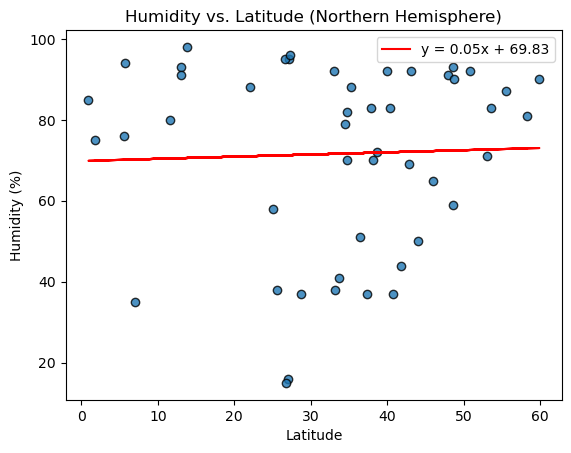

In [38]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Humidity vs. Latitude",
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere"
)

Humidity vs. Latitude (Southern Hemisphere): r-squared = 0.01


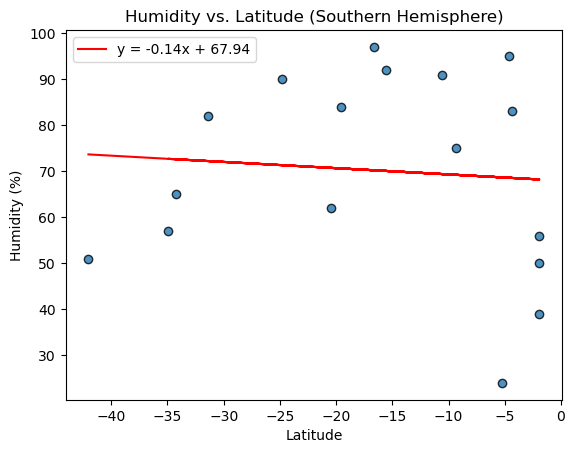

In [39]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Humidity vs. Latitude",
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Cloudiness vs. Latitude (Northern Hemisphere): r-squared = 0.01


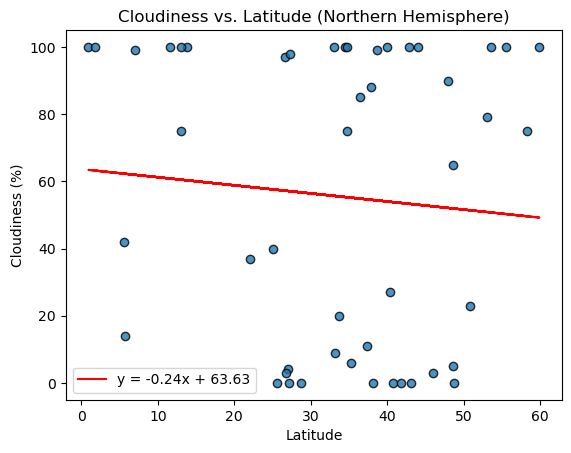

In [40]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Cloudiness vs. Latitude",
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere"
)

Cloudiness vs. Latitude (Southern Hemisphere): r-squared = 0.01


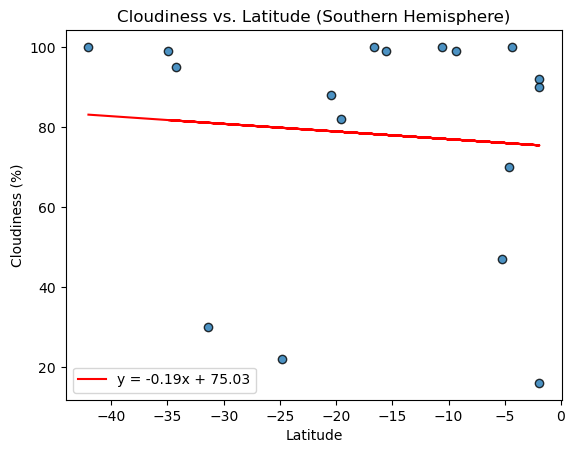

In [41]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Cloudiness vs. Latitude",
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Wind Speed vs. Latitude (Northern Hemisphere): r-squared = 0.23


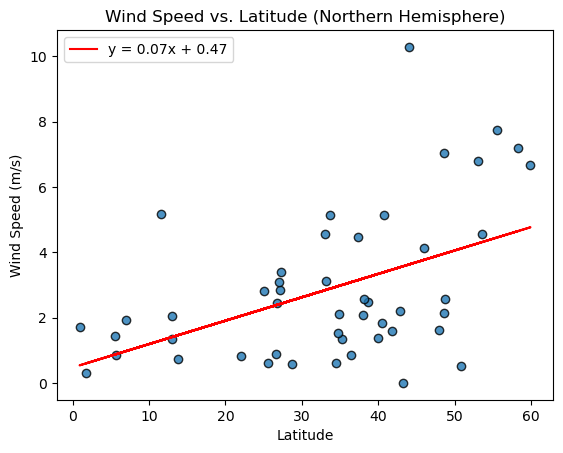

In [42]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Wind Speed vs. Latitude",
    "Latitude",
    "Wind Speed (m/s)",
    "Northern Hemisphere"
)

Wind Speed vs. Latitude (Southern Hemisphere): r-squared = 0.51


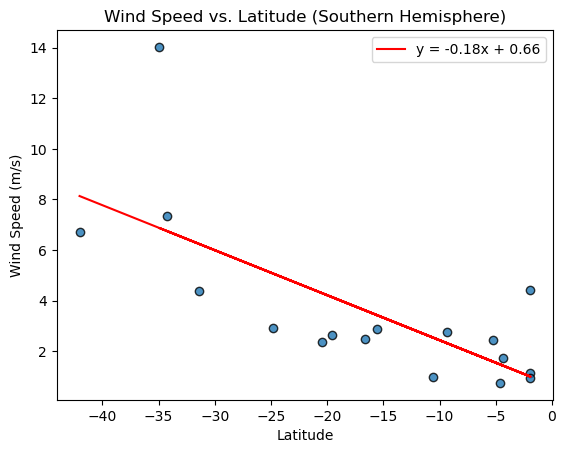

In [43]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Wind Speed vs. Latitude",
    "Latitude",
    "Wind Speed (m/s)",
    "Southern Hemisphere"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kerikeri
Processing Record 2 of Set 1 | ginir
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | bam
Processing Record 5 of Set 1 | marrakesh
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | machico
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | howrah
Processing Record 10 of Set 1 | leava
Processing Record 11 of Set 1 | agat village
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | kitakata
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | nadi
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | buckeye
Processing Record 21 of Set 1 | kozhevnikovo
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | p

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

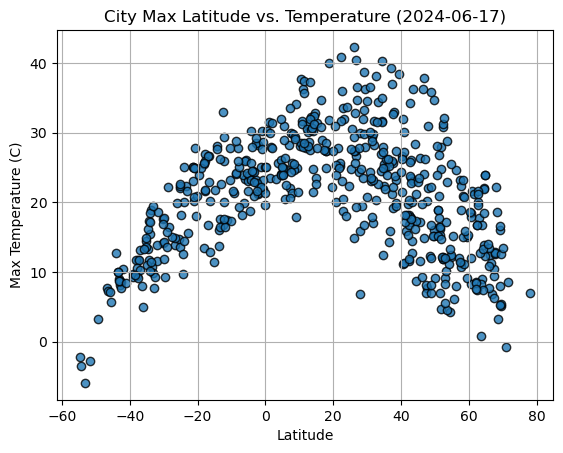

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

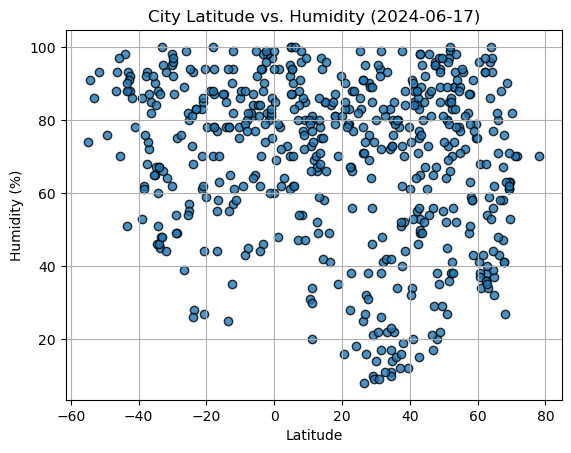

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Max Humidity"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Humidity")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

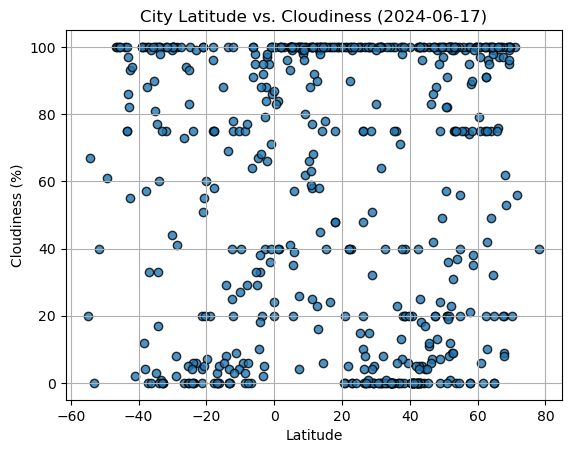

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Max Cloud"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Max Cloudiness (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

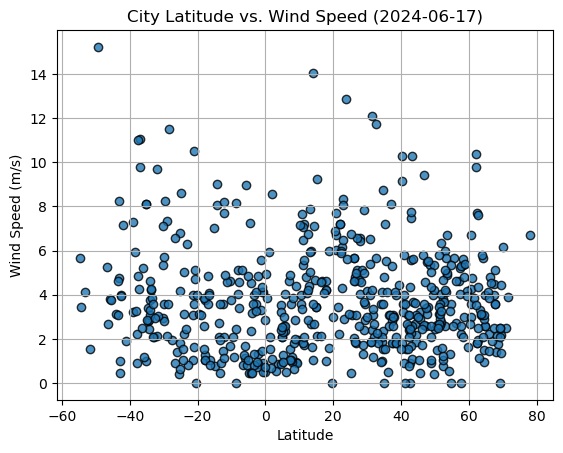

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Max Wind"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    """
    This function performs linear regression, plots the data points, the regression line,
    and displays the r-squared value and equation on the plot.

    Parameters:
    - x_values: Data for x-axis
    - y_values: Data for y-axis
    - title: Plot title
    - xlabel: Label for x-axis
    - ylabel: Label for y-axis
    - hemisphere: Hemisphere description (Northern or Southern Hemisphere)
    """
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    plt.legend()

    # Add titles and labels
    plt.title(f"{title} ({hemisphere})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Print the r-squared value
    print(f"{title} ({hemisphere}): r-squared = {rvalue**2:.2f}")

    # Show the plot
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3940754297489331


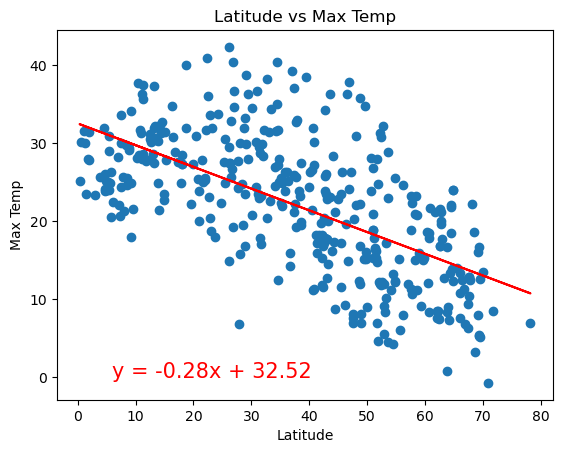

In [ ]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Max Temperature vs. Latitude",
    "Latitude",
    "Max Temperature (C)",
    "Northern Hemisphere"
)

The r^2-value is: 0.6720220238897325


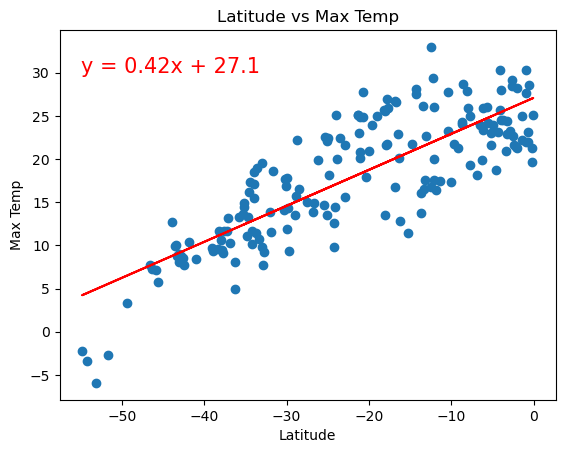

In [ ]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Max Temperature vs. Latitude",
    "Latitude",
    "Max Temperature (C)",
    "Southern Hemisphere"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


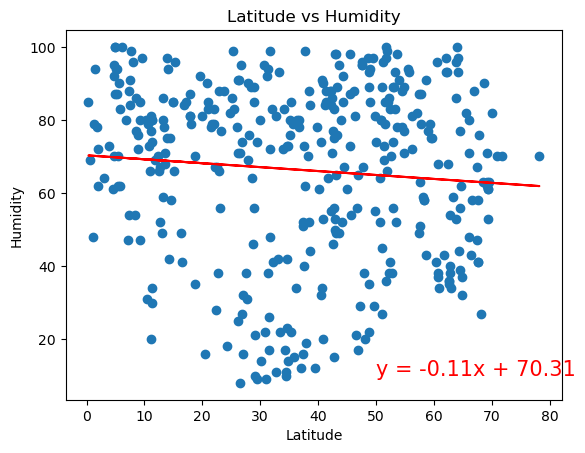

In [ ]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Humidity vs. Latitude",
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere"
)

The r^2-value is: 0.00014367159540169783


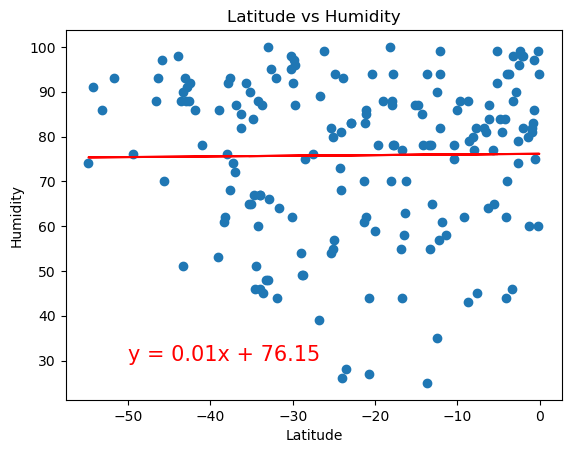

In [ ]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Humidity vs. Latitude",
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


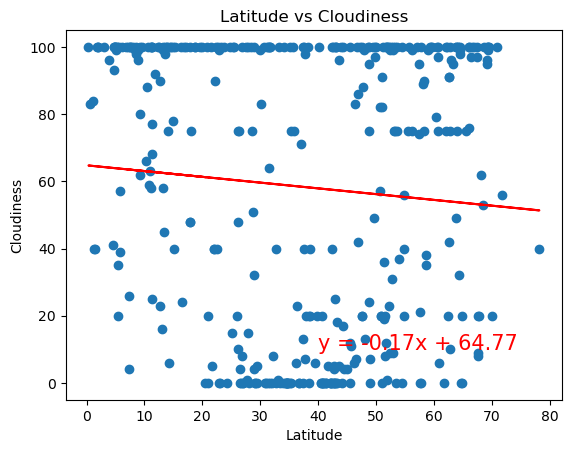

In [ ]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Cloudiness vs. Latitude",
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere"
)

The r^2-value is: 0.018616831531634456


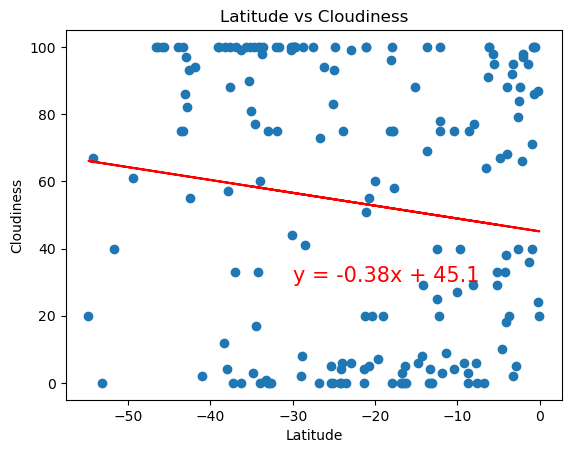

In [ ]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Cloudiness vs. Latitude",
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


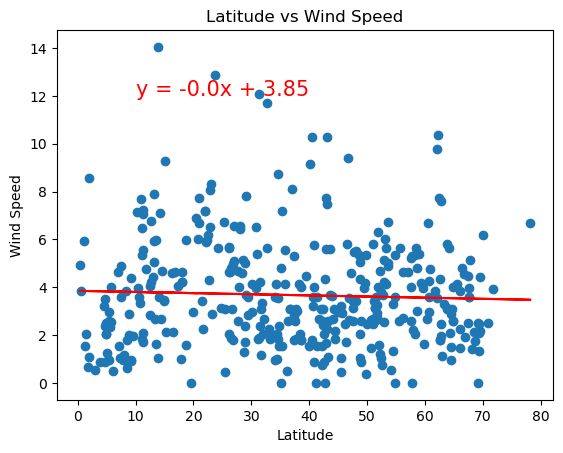

In [ ]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Wind Speed vs. Latitude",
    "Latitude",
    "Wind Speed (m/s)",
    "Northern Hemisphere"
)

The r^2-value is: 0.06495869418886388


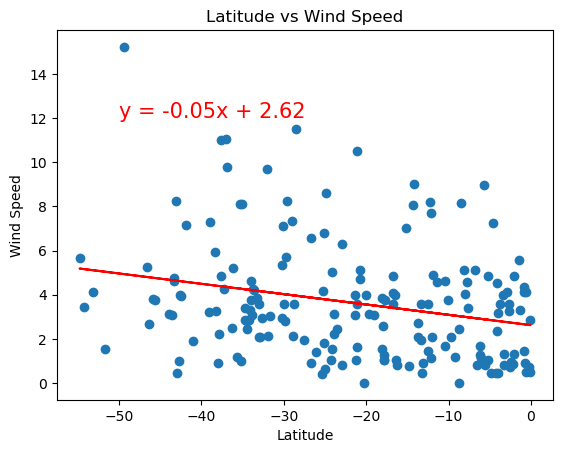

In [ ]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Wind Speed vs. Latitude",
    "Latitude",
    "Wind Speed (m/s)",
    "Southern Hemisphere"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE